In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as dates

from matplotlib import pyplot as plt

%matplotlib inline

# if turn on dynamic plots, make sure you restart kernel 
#%matplotlib notebook 

In [24]:
# read data from yahoo and set parse dates
df1 = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)
df1.head()
#df1.plot(figsize=(12,8))

,Adj Close,Volume,Adj HmL
Date,,,
1980-03-17,0.293599,62400,0.006477
1980-03-18,0.295758,63900,0.004318
1980-03-19,0.300075,40500,0.003238
1980-03-20,0.297916,18900,0.003238
1980-03-21,0.304393,97200,0.006476


In [25]:
from datetime import datetime
idx = df1.loc['2020-02-01':'2020-03-26']
idx.head()
idx = df1.loc['2020-02-01':'2020-03-26'].index
idx
stock = df1.loc['2020-02-01':'2020-03-26']['Adj Close']
stock.head()



Date
2020-02-03    133.369995
2020-02-04    135.289993
2020-02-05    137.589996
2020-02-06    137.610001
2020-02-07    137.169998
Name: Adj Close, dtype: float64

C:\Users\V\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


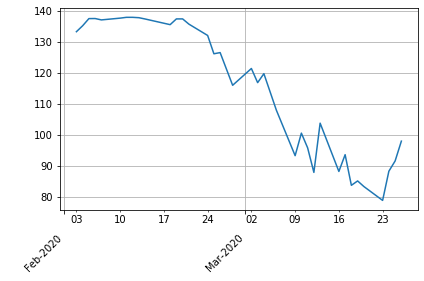

In [26]:
fig,ax = plt.subplots()

# this is more than a plot, date time indexed information 
ax.plot_date(idx,stock,'-')

# to fix overlapping x-axis
fig.autofmt_xdate()
plt.tight_layout()

# to further enhance x-axis meaning
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b-%Y'))
plt.xticks(rotation=45)  # rotation='vertical'   
# or plt.xticks(x, labels, rotation='vertical') or plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue']) 

# turn off ticks
# plt.xticks([], [])
# plt.axis('off')
'''
plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=True) # labels along the bottom edge are off
'''

# to add minor axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))  # 0 is monday, 1 is tuesday
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))   # or %a


# add grid lines
ax.xaxis.grid(True)
ax.yaxis.grid(True)

# save the figure
plt.tight_layout() # prevents the x-axis from being cut off during save
plt.savefig('plot')

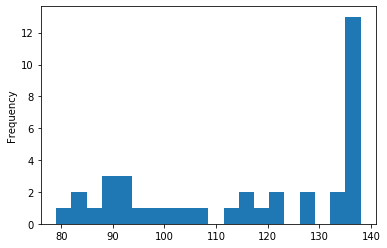

In [27]:
df1['Adj Close'].loc['2020-02-01':'2020-03-26'].plot.hist(bins=20)



Sample descriptive statistics:
                  0
count  10000.000000
mean       0.016537
std        5.013939
min      -17.957929
25%       -3.370965
50%        0.012961
75%        3.442320
max       20.153701


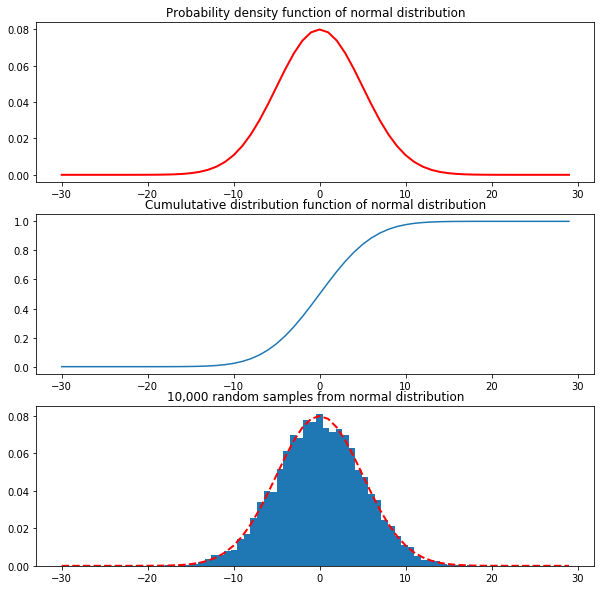

In [22]:
'''
Plot a normally distributed random variable - and samples of this process - using scipy's univariate probability distributions.
'''

from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-30,30)

# Generate normal distribution with given mean and standard deviation.
dist = norm(mu, sigma)

# Plot probability density function and of this distribution.
# the pdf() method takes takes in a list x values and returns a list of y's.
plt.figure(figsize=(10, 10))
plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('Probability density function of normal distribution')


# Plot probability density function and of this distribution.
plt.subplot(312)
plt.plot(rng, dist.cdf(rng))
plt.title('Cumulutative distribution function of normal distribution')

# Draw 1000 samples from the random variable.
sample = dist.rvs(size=10000)

print ("Sample descriptive statistics:")
print (pd.DataFrame(sample).describe())

# Plot a histogram of the samples.
plt.subplot(313)
plt.hist(sample, bins=50, density=True)
plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
plt.title('10,000 random samples from normal distribution')



# Show all plots.
plt.show()

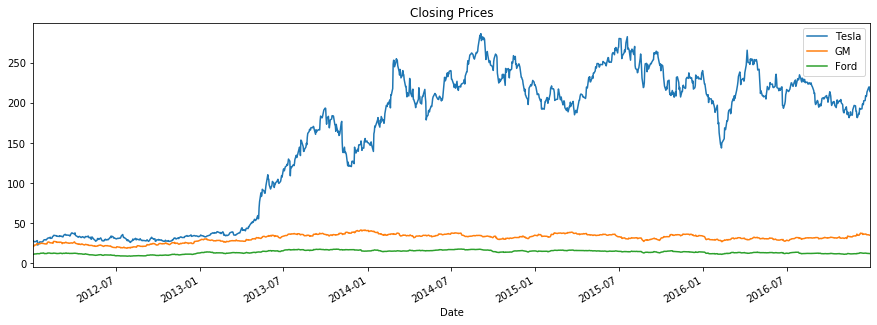

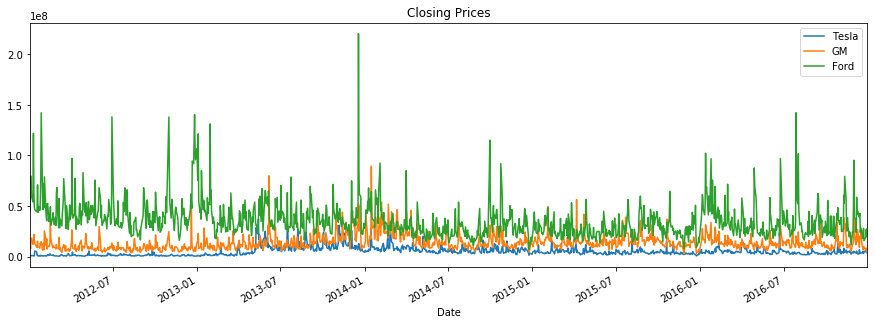

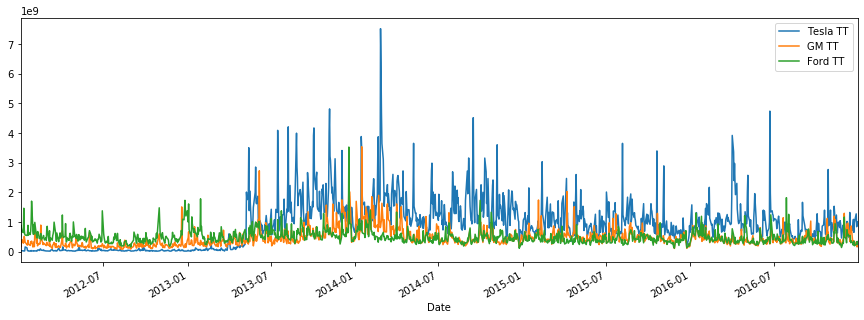

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# use pandas datareader
import pandas_datareader.data as web 
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
df1 = web.DataReader('TSLA', 'yahoo', start, end)
df2 = web.DataReader('GM', 'yahoo', start, end)
df3 = web.DataReader('F', 'yahoo', start, end)
# filter columns
df1 = df1[['Open','High','Low','Close','Volume']]
df2 = df2[['Open','High','Low','Close','Volume']]
df3 = df3[['Open','High','Low','Close','Volume']]
# Charting
df1['TSLA Close'] = df1['Close']
df2['GM Close'] = df2['Close']
df3['Ford Close'] = df3['Close']
df1['TSLA Close'].plot(label='Tesla', title='Closing Prices', figsize=(15,5))
df2['GM Close'].plot(label='GM')
df3['Ford Close'].plot(label='Ford')
# how do you set a label and legend!?!?!
# label
plt.legend()
plt.show()
# plot volume
df1['Volume'].plot(label='Tesla', title='Closing Prices', figsize=(15,5))
df2['Volume'].plot(label='GM')
df3['Volume'].plot(label='Ford')
plt.legend()
plt.show()
# total dollar value traded
df1['Total Traded'] = df1['Open']*df1['Volume']
df2['Total Traded'] = df2['Open']*df2['Volume']
df3['Total Traded'] = df3['Open']*df3['Volume']
df1['Total Traded'].plot(label='Tesla TT', figsize=(15,5))
df2['Total Traded'].plot(label='GM TT')
df3['Total Traded'].plot(label='Ford TT')
plt.legend()


C:\Users\V\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
TSLA Close      20 non-null float64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.4 KB


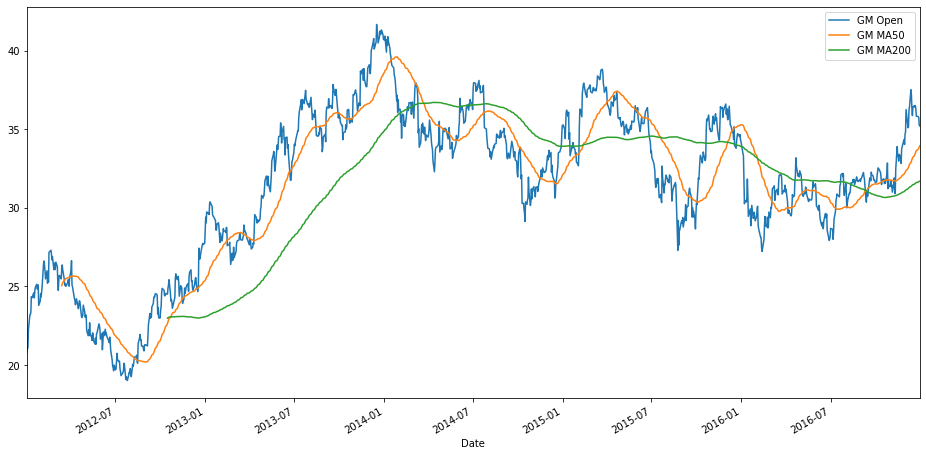

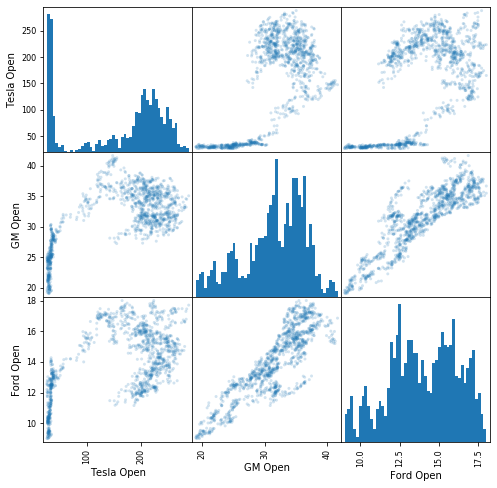

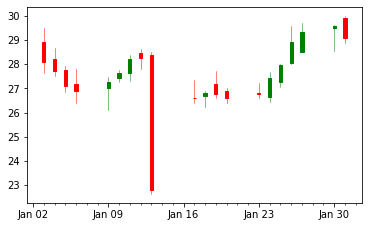

In [29]:
# plot moving average
df2['Open'].plot(label='GM Open',figsize=(16,8))
df2['Open'].rolling(50).mean().plot(label='GM MA50')
df2['Open'].rolling(200).mean().plot(label='GM MA200')
plt.legend()
# scatter plots
# build a scatter plot to see how car companies relate
from pandas.plotting import scatter_matrix 
# build a single dataframe by joining the columns together
cars_df = pd.concat([df1['Open'],df2['Open'],df3['Open']],axis=1)
# add column labels instead of just 3 Opens
cars_df.columns = ['Tesla Open', 'GM Open', 'Ford Open']
cars_df.head()
# this is the scatter matrix to see correlations
# since so many points, use alpha to see more points, and also add more histogram binds
scatter_matrix(cars_df,figsize=(8,8), alpha=0.2, hist_kwds={'bins':50})

# candle stick chart
# need to install matplotlib.finance: pip install mpl_finance
# deprecated: from matplotlib.finance import candlestick_ohlc
# does not work: from mplfinance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
# ohlc = (open, high, low, close) in tuples
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
# grab everything in January then reset the index
ford_reset = df1.loc['2012-01'].reset_index()
ford_reset.head()
ford_reset.info()
# create a numerical value for a time series index because matplotlib is not good at date processing
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_reset.head()
# create columns for OHLC
list_of_cols = ['date_ax','Open','High','Low','Close']
# create an array of tuple values
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values ]
ford_values
# copy and paste the date formatter code
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12
# Plot function
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)
candlestick_ohlc(ax, ford_values, width=0.3, colorup='g', colordown='r');

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2012-01-03 to 2012-01-31
Data columns (total 7 columns):
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
TSLA Close      20 non-null float64
Total Traded    20 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


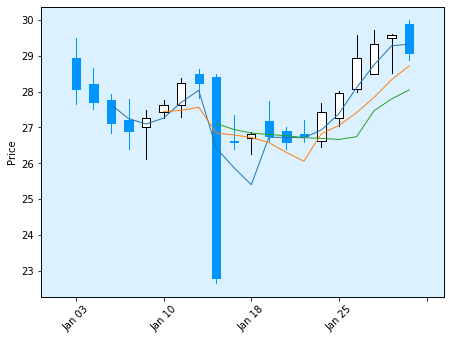

In [30]:
# new beta library: pip install mplfinance
# deprecated: from matplotlib.finance import candlestick_ohlc
# does not work: from mplfinance import candlestick_ohlc
import mplfinance as mpf
# ohlc = (open, high, low, close) in tuples
# grab everything in January then reset the index
ford_reset = df1.loc['2012-01']
ford_reset.head()
ford_reset.info()
# create columns for OHLC
list_of_cols = ['Date','Open','High','Low','Close']
# plot
mpf.plot(ford_reset,type='candle',mav=(3,6,9),style='blueskies') # or style='charles'


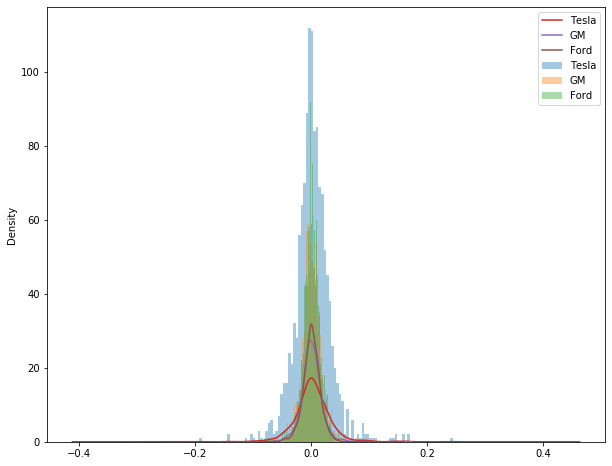

In [34]:
# calculate daily return
# shift forward 1, instead of -1 because old data shifts the prices forward 1 so you have index 
#df1['returns'] = (df1['Close']/df1['Close'].shift(1)) - 1
df1['returns'] = df1['Close'].pct_change(1)   # same as above
df2['returns'] = df2['Close'].pct_change(1)   # same as above
df3['returns'] = df3['Close'].pct_change(1)   # same as above
df1['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
df2['returns'].hist(bins=100,label='GM',alpha=0.4)
df3['returns'].hist(bins=100,label='Ford',alpha=0.4)
plt.legend()

# wider distribution means more volatile
# Kernel Density Estimation shows Tesla is wider than GM and Ford (more volatile) 
# in other words, a high peak centered around zero is more stable
df1['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
df2['returns'].plot(kind='kde',label='GM',figsize=(10,8))
df3['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
plt.legend()




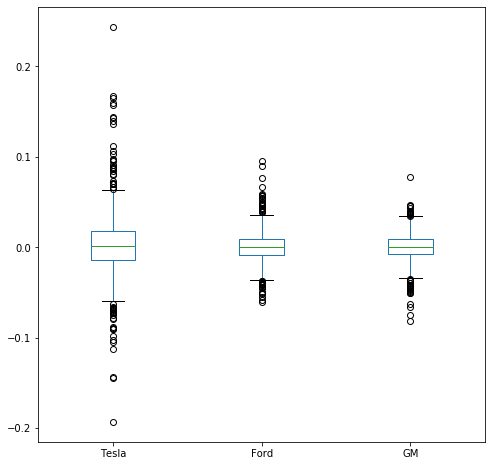

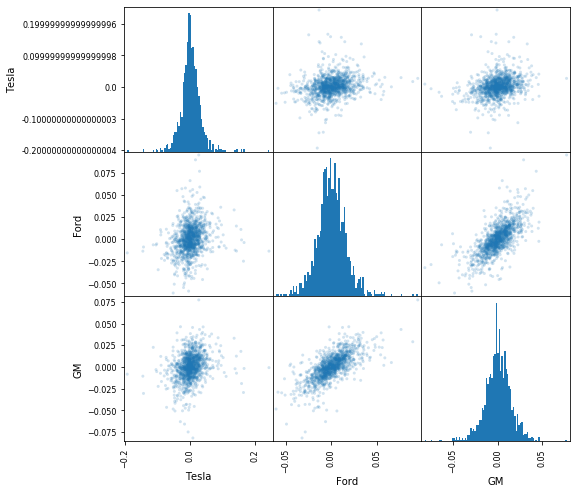

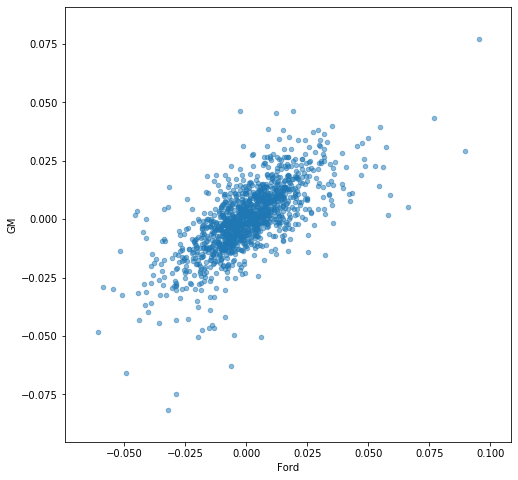

In [35]:
# box plot
box_df = pd.concat([df1['returns'],df2['returns'],df3['returns']], axis=1)
box_df.columns = ['Tesla', 'Ford', 'GM']
box_df.plot(kind='box', figsize=(8,8))

# scatter matrix and scatter
scatter_matrix(box_df, figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});
box_df.plot(kind='scatter',x='Ford',y='GM', alpha=0.5, figsize=(8,8))

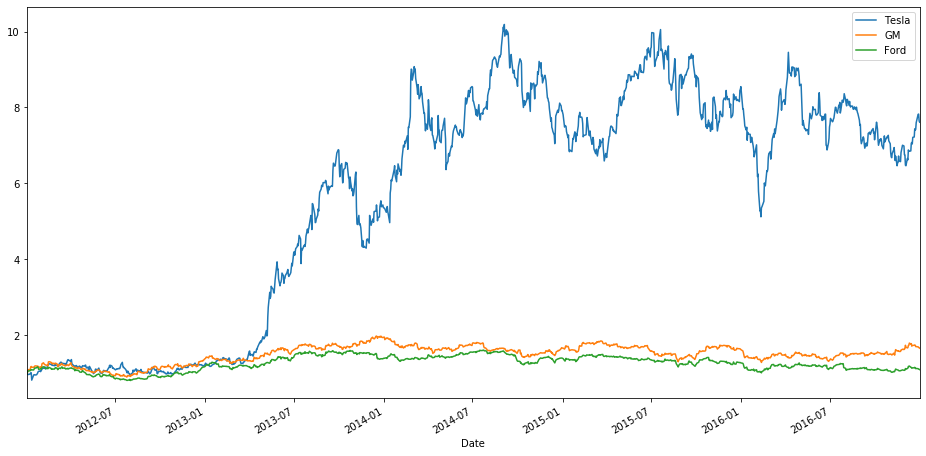

In [36]:
# cumulative cash out return on that date, relative to the start date, assuming you started on Jan 3, 2012
# create a new column and plot it
df1['Cumulative Return'] = (1 + df1['returns']).cumprod()
df2['Cumulative Return'] = (1 + df2['returns']).cumprod()
df3['Cumulative Return'] = (1 + df3['returns']).cumprod()

# plot
df1['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
df2['Cumulative Return'].plot(label='GM',figsize=(16,8))
df3['Cumulative Return'].plot(label='Ford',figsize=(16,8))
plt.legend()
